In [33]:
import pandas as pd

file = ('./data/KBO_2019_player_gamestats.csv')
raw = pd.read_csv(file, encoding='cp949')

In [34]:
raw.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,희타,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166


In [35]:
raw.columns

Index(['팀', '이름', '생일', '일자', '상대', '결과', '타순', 'P', '선발', '타수', '득점', '안타',
       '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살',
       '희타', '희비', '타율', '출루', '장타', 'OPS', '투구', 'avLI', 'RE24', 'WPA'],
      dtype='object')

In [36]:
month_list = []

for monthdate in raw['일자']:
    month = monthdate.split('-')[0]
    month_list.append(month)
raw['월'] = month_list


In [37]:
raw.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA,월
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429,03
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038,03
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146,03
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189,03
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166,03


In [38]:
columns_select = ['팀', '이름', '생일', '일자', '상대', '타수', '안타', '홈런', '루타', '타점', '볼넷', '사구', '희비', '월']
data = raw[columns_select]
data.head()

,팀,이름,생일,일자,상대,타수,안타,홈런,루타,타점,볼넷,사구,희비,월
0,두산,페르난데스,1988-04-27,03-23,한화,4,2,0,3,3,0,0,0,03
1,두산,페르난데스,1988-04-27,03-24,한화,2,0,0,0,0,0,0,0,03
2,두산,페르난데스,1988-04-27,03-26,키움,2,0,0,0,1,2,0,0,03
3,두산,페르난데스,1988-04-27,03-27,키움,4,3,0,3,1,0,0,0,03
4,두산,페르난데스,1988-04-27,03-28,키움,3,0,0,0,0,2,0,0,03


In [39]:
data_player_month = data.pivot_table(index = ['팀', '이름', '생일', '월'],
                values = ['타수', '안타', '홈런', '루타', '타점', '볼넷', '사구', '희비'],
                aggfunc = 'sum')
data_player_month.head()

루타  볼넷  사구  안타  타수  타점  홈런  희비
팀   이름  생일         월                                 
KIA 고영창 1989-02-24 04   0   0   0   0   0   0   0   0
    김선빈 1989-12-18 03   5   4   0   3  18   0   0   0
                   04  17   3   0  13  44   6   0   0
                   05  31  10   0  24  82  10   1   2
                   06  29   8   1  24  81   8   1   0

In [40]:
data_player_month.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1261 entries, ('KIA', '고영창', '1989-02-24', '04') to ('한화', '호잉', '1989-05-18', '09')
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   루타      1261 non-null   int64
 1   볼넷      1261 non-null   int64
 2   사구      1261 non-null   int64
 3   안타      1261 non-null   int64
 4   타수      1261 non-null   int64
 5   타점      1261 non-null   int64
 6   홈런      1261 non-null   int64
 7   희비      1261 non-null   int64
dtypes: int64(8)
memory usage: 91.0+ KB


In [41]:
#인덱스로 정리된 팀/이름/생일/월 데이터를 컬럼으로
data_player_month = data_player_month.reset_index()
data_player_month.head()

,팀,이름,생일,월,루타,볼넷,사구,안타,타수,타점,홈런,희비
0,KIA,고영창,1989-02-24,04,0,0,0,0,0,0,0,0
1,KIA,김선빈,1989-12-18,03,5,4,0,3,18,0,0,0
2,KIA,김선빈,1989-12-18,04,17,3,0,13,44,6,0,0
3,KIA,김선빈,1989-12-18,05,31,10,0,24,82,10,1,2
4,KIA,김선빈,1989-12-18,06,29,8,1,24,81,8,1,0


In [42]:
def cal_hit(df):
    df['타율'] = df['안타'] / df['타수']
    df['출루율'] = (df['안타']+df['볼넷']+df['사구']) / (df['타수']+df['볼넷']+df['사구']+df['희비'])
    df['장타율'] = df['루타'] / df['타수']
    df['OPS'] = df['출루율'] + df['장타율']
    
    return df

In [43]:
player_month_stat = cal_hit(data_player_month)
player_month_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   팀       1261 non-null   object 
 1   이름      1261 non-null   object 
 2   생일      1261 non-null   object 
 3   월       1261 non-null   object 
 4   루타      1261 non-null   int64  
 5   볼넷      1261 non-null   int64  
 6   사구      1261 non-null   int64  
 7   안타      1261 non-null   int64  
 8   타수      1261 non-null   int64  
 9   타점      1261 non-null   int64  
 10  홈런      1261 non-null   int64  
 11  희비      1261 non-null   int64  
 12  타율      1142 non-null   float64
 13  출루율     1147 non-null   float64
 14  장타율     1142 non-null   float64
 15  OPS     1142 non-null   float64
dtypes: float64(4), int64(8), object(4)
memory usage: 157.8+ KB


In [44]:
player_month_stat.head()

,팀,이름,생일,월,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,KIA,고영창,1989-02-24,04,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,KIA,김선빈,1989-12-18,03,5,4,0,3,18,0,0,0,0.166667,0.318182,0.277778,0.595960
2,KIA,김선빈,1989-12-18,04,17,3,0,13,44,6,0,0,0.295455,0.340426,0.386364,0.726789
3,KIA,김선빈,1989-12-18,05,31,10,0,24,82,10,1,2,0.292683,0.361702,0.378049,0.739751
4,KIA,김선빈,1989-12-18,06,29,8,1,24,81,8,1,0,0.296296,0.366667,0.358025,0.724691


In [45]:
player_month_stat = player_month_stat.dropna()
player_month_stat.head()

,팀,이름,생일,월,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
1,KIA,김선빈,1989-12-18,03,5,4,0,3,18,0,0,0,0.166667,0.318182,0.277778,0.595960
2,KIA,김선빈,1989-12-18,04,17,3,0,13,44,6,0,0,0.295455,0.340426,0.386364,0.726789
3,KIA,김선빈,1989-12-18,05,31,10,0,24,82,10,1,2,0.292683,0.361702,0.378049,0.739751
4,KIA,김선빈,1989-12-18,06,29,8,1,24,81,8,1,0,0.296296,0.366667,0.358025,0.724691
5,KIA,김선빈,1989-12-18,07,18,6,0,14,39,5,1,0,0.358974,0.444444,0.461538,0.905983


In [46]:
month_pivot = player_month_stat.pivot_table(index = ['팀','이름', '생일'],
                             values = '출루율',
                             columns = '월')
month_pivot.head()

월                         03        04        05        06        07  \
팀   이름  생일                                                             
KIA 김선빈 1989-12-18  0.318182  0.340426  0.361702  0.366667  0.444444   
    김주찬 1981-03-25  0.272727  0.236364  0.352941  0.329114  0.431818   
    나지완 1985-05-19  0.333333  0.343750  0.200000  0.410256  0.071429   
    류승현 1997-07-01  0.000000  0.375000  0.310345  0.280702       NaN   
    문경찬 1992-07-08  0.000000       NaN       NaN       NaN       NaN   

월                         08        09  10  
팀   이름  생일                                  
KIA 김선빈 1989-12-18  0.320000  0.386364 NaN  
    김주찬 1981-03-25  0.390244  0.333333 NaN  
    나지완 1985-05-19       NaN       NaN NaN  
    류승현 1997-07-01       NaN  0.277778 NaN  
    문경찬 1992-07-08       NaN       NaN NaN

In [47]:
#시즌별 타자 실적 데이터
file ='./data/player_stat.csv'
player_stat = pd.read_csv(file, encoding='cp949')
player_stat.head(10)

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,NC,나성범,1989-10-03,60,12,1,34,93,14,4,0,0.365591,0.443396,0.645161,1.088558
1,NC,양의지,1987-06-05,225,48,15,139,394,68,20,6,0.352792,0.436285,0.571066,1.007351
2,KT,강백호,1999-07-29,217,61,2,147,438,65,13,4,0.335616,0.415842,0.495434,0.911275
3,KIA,최형우,1983-12-16,221,85,7,137,456,86,17,7,0.300439,0.412613,0.484649,0.897262
4,두산,페르난데스,1988-04-27,277,63,6,197,581,90,15,6,0.339071,0.405488,0.476764,0.882252
5,NC,박민우,1993-02-06,203,42,9,161,471,45,1,6,0.341826,0.401515,0.430998,0.832513
6,한화,최재훈,1989-08-27,135,56,14,108,373,31,3,4,0.289544,0.398210,0.361930,0.760141
7,키움,박병호,1986-07-10,265,85,14,133,475,107,36,9,0.280000,0.397942,0.557895,0.955836
8,KT,송민섭,1991-08-02,18,6,3,16,53,4,0,1,0.301887,0.396825,0.339623,0.736448
9,삼성,러프,1986-07-28,243,80,7,138,472,101,22,9,0.292373,0.396127,0.514831,0.910957


In [48]:
#시즌 기록과 월별 출루율 병합
df = pd.merge(player_stat, month_pivot, how='left', on = ['팀', '이름', '생일'])
#left_on = ['팀', '이름', '생일'], right_on = ['팀', '이름', '생일']
df.head()



,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,...,장타율,OPS,03,04,05,06,07,08,09,10
0,NC,나성범,1989-10-03,60,12,1,34,93,14,4,...,0.645161,1.088558,NaN,0.434783,0.500000,NaN,NaN,NaN,NaN,NaN
1,NC,양의지,1987-06-05,225,48,15,139,394,68,20,...,0.571066,1.007351,0.500000,0.416667,0.528090,0.364583,0.526316,0.441176,0.400000,0.333333
2,KT,강백호,1999-07-29,217,61,2,147,438,65,13,...,0.495434,0.911275,0.447368,0.323810,0.464286,0.456522,NaN,0.435294,0.383562,NaN
3,KIA,최형우,1983-12-16,221,85,7,137,456,86,17,...,0.484649,0.897262,0.333333,0.361702,0.400000,0.402062,0.400000,0.485714,0.478261,NaN
4,두산,페르난데스,1988-04-27,277,63,6,197,581,90,15,...,0.476764,0.882252,0.484848,0.449541,0.364407,0.424779,0.333333,0.431193,0.397590,0.315789


In [49]:
#출루율 실적을 기준으로 정렬, 출루율 상위 50인의 데이터만 가져오기
df_sort = df.sort_values(by = '출루율', ascending = False).head(50)

In [53]:
#출루율 관련 실적만
df_sort.columns

df_selected = df_sort[['팀', '이름', '출루율', '03', '04', '05', '06', '07', '08', '09', '10']]
df_selected

,팀,이름,출루율,03,04,05,06,07,08,09,10
0,NC,나성범,0.443396,NaN,0.434783,0.500000,NaN,NaN,NaN,NaN,NaN
1,NC,양의지,0.436285,0.500000,0.416667,0.528090,0.364583,0.526316,0.441176,0.400000,0.333333
2,KT,강백호,0.415842,0.447368,0.323810,0.464286,0.456522,NaN,0.435294,0.383562,NaN
3,KIA,최형우,0.412613,0.333333,0.361702,0.400000,0.402062,0.400000,0.485714,0.478261,NaN
4,두산,페르난데스,0.405488,0.484848,0.449541,0.364407,0.424779,0.333333,0.431193,0.397590,0.315789
5,NC,박민우,0.401515,NaN,0.375000,0.448276,0.344086,0.400000,0.415730,0.395062,0.500000
6,한화,최재훈,0.398210,0.586207,0.343750,0.409639,0.459016,0.327869,0.394366,0.371795,NaN
7,키움,박병호,0.397942,0.361111,0.517647,0.377193,0.375000,0.358209,0.377193,0.406250,0.381818
8,KT,송민섭,0.396825,0.500000,0.000000,0.545455,0.400000,0.125000,0.625000,0.166667,NaN
9,삼성,러프,0.396127,0.484848,0.407407,0.384615,0.436170,0.349398,0.376344,0.387097,NaN


In [57]:
#팀, 이름 컬럼은 인덱스로 지정
df_selected = df_selected.set_index(['팀', '이름'])
df_selected

출루율        03        04        05        06        07  \
팀   이름                                                                  
NC  나성범    0.443396       NaN  0.434783  0.500000       NaN       NaN   
    양의지    0.436285  0.500000  0.416667  0.528090  0.364583  0.526316   
KT  강백호    0.415842  0.447368  0.323810  0.464286  0.456522       NaN   
KIA 최형우    0.412613  0.333333  0.361702  0.400000  0.402062  0.400000   
두산  페르난데스  0.405488  0.484848  0.449541  0.364407  0.424779  0.333333   
NC  박민우    0.401515       NaN  0.375000  0.448276  0.344086  0.400000   
한화  최재훈    0.398210  0.586207  0.343750  0.409639  0.459016  0.327869   
키움  박병호    0.397942  0.361111  0.517647  0.377193  0.375000  0.358209   
KT  송민섭    0.396825  0.500000  0.000000  0.545455  0.400000  0.125000   
삼성  러프     0.396127  0.484848  0.407407  0.384615  0.436170  0.349398   
SK  최정     0.396104  0.281250  0.443299  0.370370  0.550000  0.357143   
키움  샌즈     0.393985  0.457143  0.424779  0.347458  0.413043  0.460526   
두산  박건우    0.390597  0.352941  0.373832  0.436893  0.382022  0.416667   
키움  이정후    0.390280  0.333333  0.336634  0.392000  0.424242  0.341772   
NC  박석민    0.389640  0.533333  0.375000  0.440678  0.328947  0.409639   
KIA 유민상    0.386139       NaN       NaN  0.421053  0.000000  0.636364   
두산  김재호    0.384778  0.241379  0.361446  0.450000  0.447368  0.372881   
키움  김하성    0.384047  0.405405  0.419355  0.429752  0.347826  0.347222   
KT  유한준    0.382562  0.394737  0.290323  0.397959  0.388889  0.461538   
한화  김태균    0.382000  0.514286  0.390244  0.415385  0.420000  0.316456   
KIA 터커     0.380952       NaN       NaN  0.259259  0.422018  0.507463   
KT  로하스    0.380623  0.368421  0.333333  0.424779  0.419753  0.355263   
KIA 안치홍    0.379902  0.428571  0.382716  0.372727  0.489362  0.302326   
LG  이천웅    0.379747  0.333333  0.404255  0.347826  0.403361  0.375000   
롯데  민병헌    0.379475  0.416667  0.642857  0.633333  0.394495  0.270270   
SK  한동민    0.377210  0.314286  0.387755  0.418367  0.405941  0.378378   
키움  서건창    0.370577  0.314286  0.392857  0.383838  0.338462       NaN   
SK  로맥     0.368333  0.206897  0.336634  0.400000  0.380531  0.363636   
두산  오재일    0.366483  0.343750  0.301587  0.361905  0.402778  0.434211   
LG  김현수    0.364668  0.294118  0.452632  0.342105  0.380952  0.434211   
KT  조용호    0.363636       NaN       NaN  0.272727  0.450980  0.369863   
KIA 이창진    0.362661  0.000000  0.405063  0.351064  0.409091  0.214286   
키움  박동원    0.361644       NaN  0.488372  0.327273  0.369863  0.318841   
두산  김재환    0.361630  0.393939  0.388889  0.336364  0.407767  0.263158   
삼성  김헌곤    0.361472  0.315789  0.245283  0.441176  0.346939  0.448980   
LG  채은성    0.360748  0.333333  0.341463  0.333333  0.363636  0.371429   
롯데  손아섭    0.359788  0.428571  0.367816  0.324786  0.394495  0.328571   
KIA 김선빈    0.359729  0.318182  0.340426  0.361702  0.366667  0.444444   
롯데  전준우    0.358678  0.294118  0.370000  0.404959  0.384615  0.347222   
NC  이명기    0.358456  0.457143  0.385542  0.303371  0.360000  0.329114   
LG  이형종    0.358149  0.371429  0.409091  0.368421  0.356436  0.327586   
두산  정수빈    0.357955  0.428571  0.414894  0.323529  0.294118  0.300000   
삼성  김상수    0.357542  0.484848  0.310000  0.352381  0.398058  0.390244   
KT  황재균    0.357002  0.270270  0.326733  0.306931  0.401961  0.378378   
NC  권희동    0.356968  0.323529  0.325843  0.357798  0.397590  0.347826   
롯데  아수아헤   0.356021  0.437500  0.345679  0.375000  0.142857       NaN   
NC  모창민    0.355670  0.483871  0.370370  0.500000  0.358696  0.383562   
롯데  이대호    0.355191  0.264706  0.368421  0.454545  0.310680  0.217391   
삼성  박계범    0.353535       NaN  0.441176  0.310345       NaN       NaN   
두산  허경민    0.353370  0.200000  0.377551  0.373832  0.333333  0.350000   

                 08        09        10  
팀   이름                                   
NC  나성범         NaN       NaN       NaN  
    양의지    0.441176  0.400000  0.333333  
KT  강백호    0.435294  0.383562       NaN  
KIA 최형우  

In [58]:
# 아래 코드는 seaborn, matplotlib으로 시각화를 진행할때 데이터에 한글이 들어있다면 copy&paste 한 뒤 사용하시면 됩니다. 
# 이미지 상에 들어있는 한글을 표시하기 위한 한글 폰트를 지정하고, 필요한 라이브러리를 불러들이는 코드입니다. 
import matplotlib
from matplotlib import font_manager, rc
import platform
import matplotlib.pyplot as plt
import seaborn as sns

# 이미지 한글 표시 설정
if platform.system() == 'Windows':  # 윈도우인 경우 맑은고딕
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    # Mac 인 경우 애플고딕
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False 

<AxesSubplot:ylabel='팀-이름'>

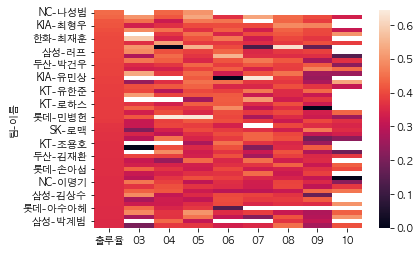

In [59]:
#기본 히트맵
sns.heatmap(df_selected)

<AxesSubplot:ylabel='팀-이름'>

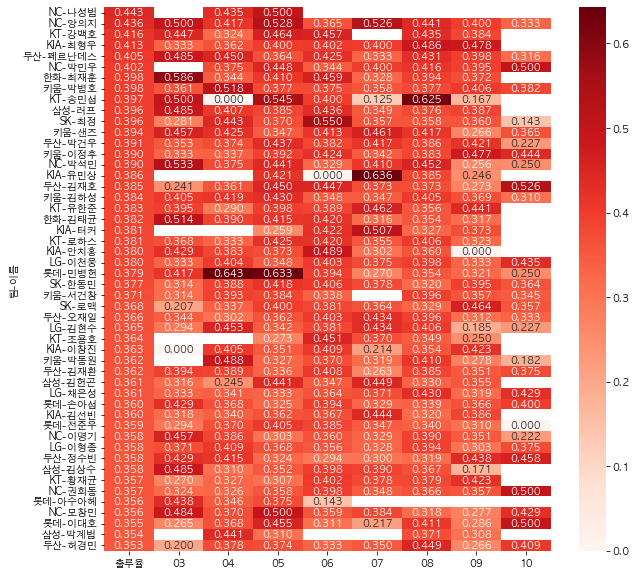

In [63]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(df_selected,
           annot = True, fmt = '.3f',
           cmap = 'Reds')

In [65]:
#시즌 전체 대비 월별 실적
for col in (df_selected.columns[1:]):
    df_selected[col] = df_selected[col] - df_selected['출루율']

df_selected['출루율'] = 0.0
df_selected.head()

출루율        03        04        05        06        07        08  \
팀   이름                                                                       
NC  나성범    0.0       NaN -0.008614  0.056604       NaN       NaN       NaN   
    양의지    0.0  0.063715 -0.019618  0.091805 -0.071702  0.090031  0.004891   
KT  강백호    0.0  0.031527 -0.092032  0.048444  0.040680       NaN  0.019453   
KIA 최형우    0.0 -0.079279 -0.050910 -0.012613 -0.010551 -0.012613  0.073102   
두산  페르난데스  0.0  0.079361  0.044053 -0.041081  0.019291 -0.072154  0.025705   

                 09        10  
팀   이름                         
NC  나성범         NaN       NaN  
    양의지   -0.036285 -0.102952  
KT  강백호   -0.032280       NaN  
KIA 최형우    0.065648       NaN  
두산  페르난데스 -0.007897 -0.089698

<AxesSubplot:ylabel='팀-이름'>

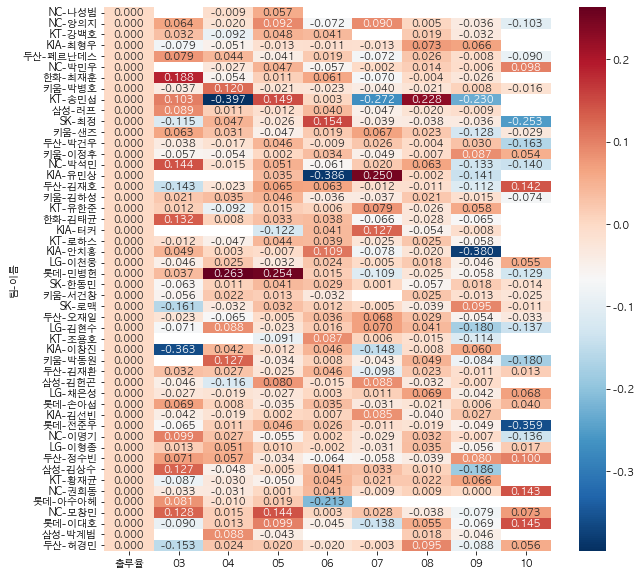

In [74]:
fig, ax = plt.subplots(figsize = (10, 10))

sns.heatmap(df_selected,
           annot = True, fmt = '.3f',
           cmap = 'RdBu_r')